In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [29]:
data = pd.read_csv('database.csv')


In [30]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,150,50,1.5,0.226
1,150,100,1.5,0.286
2,150,150,1.5,0.260
3,150,50,1.0,0.293
4,150,100,1.0,0.237


In [31]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [32]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [33]:
X=data.drop(['Tool wear\nTWmax'], axis=1)


In [34]:
y=data['Tool wear\nTWmax']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [39]:
tree_regressor = DecisionTreeRegressor()
tree_regressor_1 = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
print('Accuracy score on Test data= {:.4f}'.format(tree_regressor.score(X_test, y_test)))
cv = KFold(n_splits=10, random_state=42)
scores = cross_val_score(tree_regressor_1, X, y, cv=cv)
print(scores)

Accuracy score on Test data= 1.0000
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


C:\Users\uchih\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [15]:
pred=tree_regressor.predict(X_test)
comparison=pd.DataFrame()


In [16]:
comparison['True Tool wear\nTWmax']=y_test
comparison['Predicted Tool wear\nTWmax']=pred

In [17]:
comparison

,True Tool wear\nTWmax,Predicted Tool wear\nTWmax
198,0.415,0.415
349,0.379,0.379
33,0.272,0.272
208,0.226,0.226
93,0.360,0.360
...,...,...
97,0.312,0.312
228,0.311,0.311
68,0.386,0.386
23,0.445,0.445


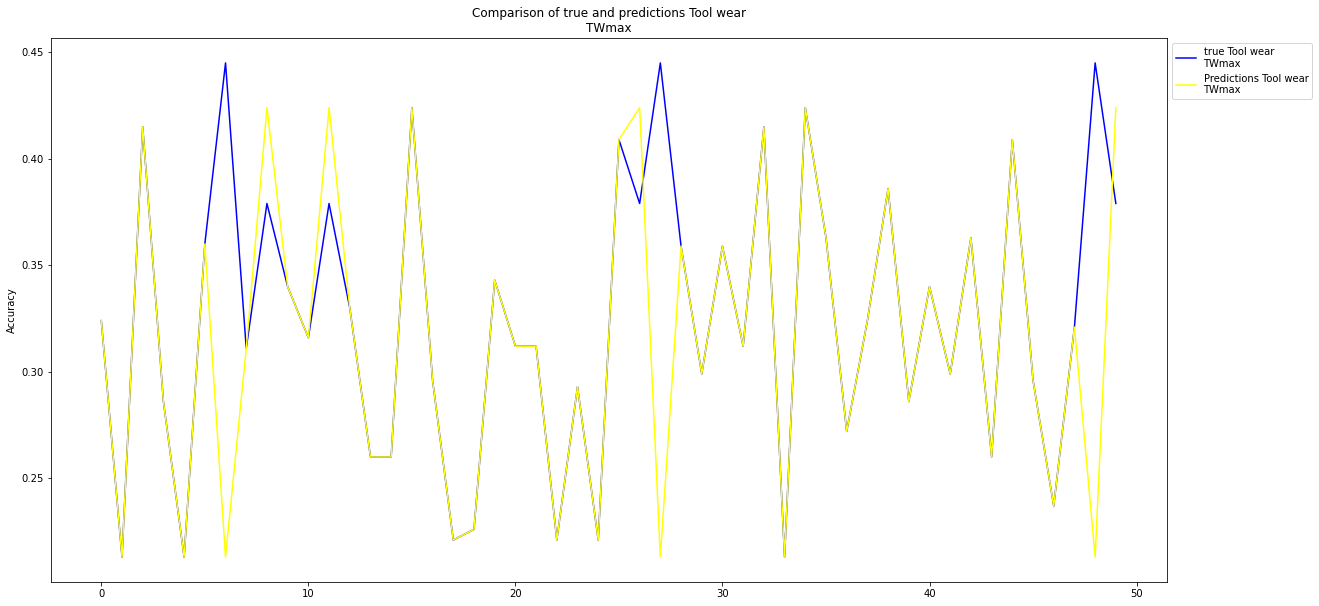

In [33]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [34]:
comparison.to_csv(r'ridge.csv', index = False, header=True)